# ***Sparks Foundation (Task 1)***
### **Student's performance based on the study hours**

# **Prithwijit Ghosh**

It is general intuision that the students grade is too much depended on the number of hours they study. So in this assignment we try to find that wheather it is true or not....

So we will try to fit a supervised model, actually simple linear regression, to see the dependency and the model accuracy.
Finally we will predict the score if a particular student spend his/her **9.25 hours per day**.

### **Dataset link and Decription**

The link of the dataset as provided is given below -- <br>
http://bit.ly/w-data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
D = pd.read_csv("/content/student_scores - student_scores.csv")
D.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


From the above dataset the first column **Hours** represent the number of hours spend as study hours and **Scores** represent that the scores of each student corresponding to their study hours

### **Exploratory Data Analysis**
Let us create some sort of visualization based on our dataset. Here we plot the histograms for both these two variables -- <br>
1. Study Hours
2. Scores

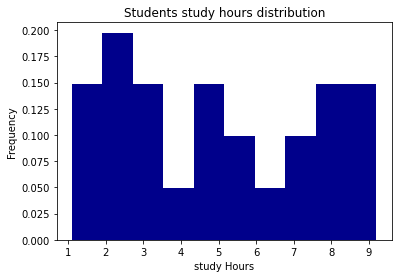

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plot 1
plt.hist(D.Hours,density = True,color = "darkblue")
plt.xlabel("study Hours")
plt.ylabel("Frequency")
plt.title("Students study hours distribution")
plt.show()


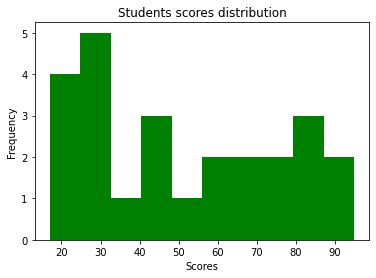

In [ ]:
#plot 2
plt.hist(D.Scores,color = "green")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.title("Students scores distribution")
plt.show()


From the above two histograms we can't say anything about the distribution of the corresponding variables, because the distribution is not similar to any of the known statistical distribution.

Now wev plot the scatterplot among these variables.

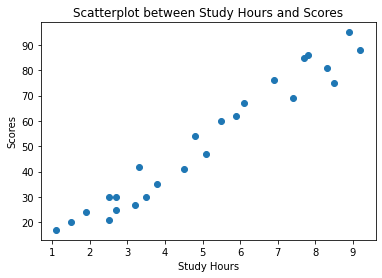

In [ ]:
plt.scatter(D.Hours,D.Scores)
plt.xlabel("Study Hours")
plt.ylabel("Scores")
plt.title("Scatterplot between Study Hours and Scores")
plt.show()

From the above scatterplot it is very clear that the variable study Hours is almost pefectly linearly dependent on the variable Scores.

**Boxplots for an easy Visualization**


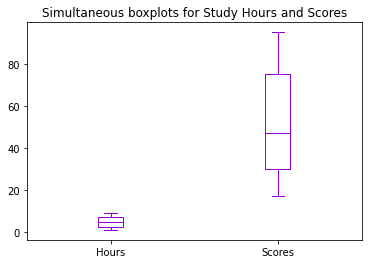

In [ ]:
D.plot.box(color = "darkviolet")
plt.title("Simultaneous boxplots for Study Hours and Scores")
plt.show()

From the above boxplot we can say that <br>

1.   The **median** is nearly in the middle position for both of these two variables indicating that the distributions are nearly **symmetrical** for both of them.
2.   There are no **outlier** for any of the variables, thay are quite balance from the inferencial perspective.
3.   The **sparsity** of these two distributions are not the same.Looking at the InterQuartile Range it is fairly obvious tht IQR for **Scores** is nearly 5 times the IQR for **Hours**.



**Jointplot**


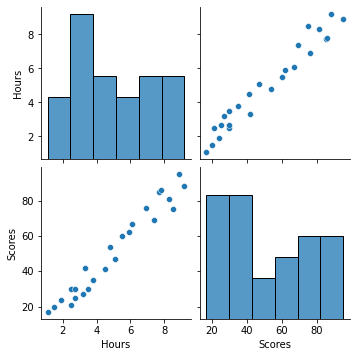

In [ ]:
sns.pairplot(D)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


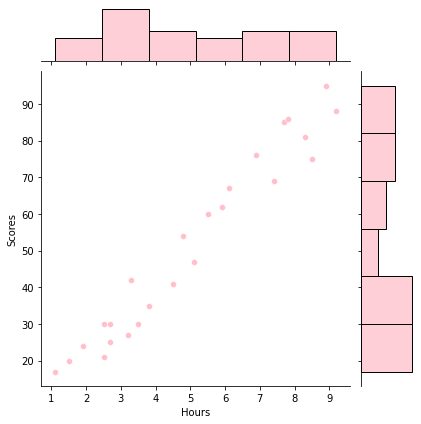

In [ ]:
sns.jointplot(D.Hours,D.Scores,color = "pink")
plt.show()

### **Test For Regression**
It is necessary to test wheather the regression is valid or not i.e. wheather Study Hours has any impact on the response variable Scores.
so, we want to test --<br>


---
$$H_0 : \beta_1 = 0\ \ \ \ \ \ vs \ \ \ \ \ H_1 : \beta_1 \neq 0$$

Let us define the test statistic -- <br>
$\ \ \ \ \  \ \ \ \  T = \frac{\hat\beta_1\ -\ \beta_1}{sd(\hat\beta_1)}$

Under the Null Hypothesis($H_0$) we know that $T$ follows a noraml distribution with mean $\hat \beta_1$ and variance $\frac{S_{xy}}{S_{xx}}$(after the assumption that the random error component follows a normal distribution with mean 0 and variance $\sigma^2$).

So we can test the above hypothesis based on the rejection criterion i.e.<br>

$\ \ \ \ \ if\ \ \ \ \ \  |T|\ >\ \tau_{\frac{\alpha}{2}} \ \ \ \ \ reject \ \  H_0$<br>
$\ \ \ \ \ else\ \ \ \ \ \ accept \ \ H_0$<br>

Where<br>
 $\alpha$ is the level of significance (in our case it 0.05)<br>
 and $\tau_{\frac{\alpha}{2}}$ is the $\frac{\alpha}{2}$th percentile point of a standard normal distrinution. 


In [ ]:
Cov = np.cov(D.Hours,D.Scores)
S_xy = Cov[1,0]
S_xx = np.var(D.Hours)

In [ ]:
sd_beta1 = np.sqrt(S_xy/S_xx)
t = (beta1 - 0)/sd_beta1
if (abs(t) > scipy.stats.norm.ppf(0.975)):
  print("The Null Hypothesis is rejected at 5% level of significance")
else:
  print("The Null Hypothesis is accepted at 5% level of significance")

The Null Hypothesis is rejected at 5% level of significance


Since the Null Hypothesis ($H_0$) is rejected so oue regression modelling is valid and we can proceed with our further analysis.

### **Model fitting and evaluation**
Here we will fit a linear regression model with only one regressor as **Study Hours** and the response variable is **Scores**, i.e. it is a simple linear regression model.

So, we will fit a straight line and we have to estimate the intercept and the slope parameter based on the given data.

In [ ]:
from sklearn.linear_model import LinearRegression 
import scipy.stats

In [ ]:
X = D.Hours
y = D.Scores
X = X[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
Model = LinearRegression(fit_intercept = True)
Model.fit(X,y)
beta1 = Model.coef_
print("Coefficient Corresponding to Study Hours is :",beta1)
beta0 = Model.intercept_
print("Coefficient Corresponding to Study Hours is :",beta0)

Coefficient Corresponding to Study Hours is : [9.77580339]
Coefficient Corresponding to Study Hours is : 2.48367340537321


### **Residual plot**

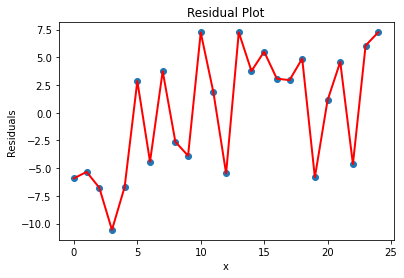

In [ ]:
y_predicted = Model.predict(X)
residual = y - y_predicted
plt.scatter(np.arange(len(y)),residual)
plt.plot(np.arange(len(y)),residual,linewidth = 2,color = "red")
plt.xlabel("x")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

From the above residual plot we can say that there seems to no pattern in the plot, so the residual plot is overall random and the model looks like perfect in the residual analysis points of view.

### **Model Accuracy Checking**

In [ ]:
from sklearn.metrics import r2_score
R_squared = r2_score(y,y_predicted)
print("So, The R squared value for this given model is :",R_squared)

So, The R squared value for this given model is : 0.9529481969048356


We know that the $R^2$ value indiactes that how much does the model fit data or in other words how much the variance in the response variable captured by the model...<br>
In our model we see that the $R^2$ value is 0.9529, shows that the model perfectly explains approximately 95% of the total variability.

In [ ]:
Adj_R_squared = 1 - ((1 - R_squared)*(len(y)-1)/(len(y) - 2))
print("So, The adjusted R squared value for this given model is :",Adj_R_squared)

So, The adjusted R squared value for this given model is : 0.9509024663354806


Though $R^2$ is very much explinable for regression analysis but it has a serios drawback that it depends on the number of regressor variables and increases with increasing feature.

So instead of using the $R^2$ value here we would choose another very important measure of accuracy, $adjusted\ R^2$.
Mathematically,
$$adjusted\ R^2\ =\ 1\ -\ (1\ -\ R^2)\frac{n\ -\ 1}{n\ -\ k\ -\ 1}$$
where <br>
n = number of observations<br>
k = number of predictors<br>
in our case k = 1.<br>
<br>
<br>
For our model we see that the $adjusted\ R^2$ is 0.9509, so it is not too much different with adjusted $R^2$. So we can safely conclude that the simple linear regression model for our given scenario is a good choice.

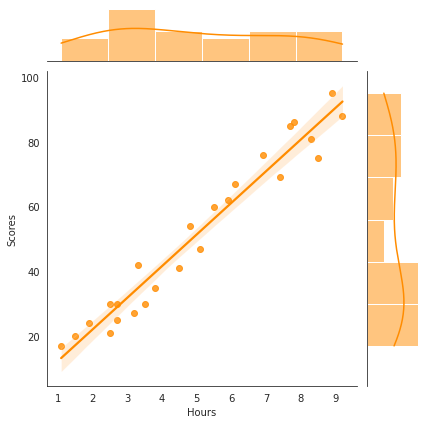

In [ ]:
with sns.axes_style("white"):
  sns.jointplot(x = D.Hours, y = D.Scores, kind = "reg",color = "darkorange")

plt.show()


### **Prediction**

Now we are able to predict the **Score** of a particular student if he/she studies **9.25 hours** daily

In [ ]:
predict_x = 9.25
predict_y = beta0 + beta1*predict_x
predict_y

array([92.90985477])

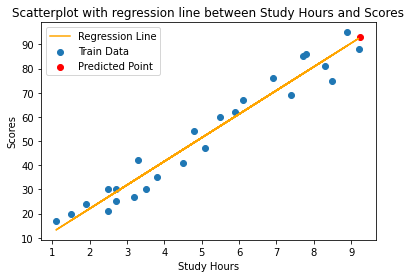

In [ ]:
plt.scatter(D.Hours,D.Scores,label = "Train Data")
plt.plot(D.Hours,beta0 + beta1*D.Hours, label = "Regression Line",color = "orange")
plt.scatter(predict_x,predict_y,color = "red",label = "Predicted Point")
plt.legend()
plt.xlabel("Study Hours")
plt.ylabel("Scores")
plt.title("Scatterplot with regression line between Study Hours and Scores")
plt.show()

As the above two blocks show that the prediction of **Scores** when it is given that the **Study Hours** is **9.25** is 92.9098 or nearly **93%**. The above plot shows that point graphically. Since we can predict **short term prediction** by the linear regression model and also the accuracy of our regression model is nearly **95%** hence our prediction for the point 9.25 is approxiemately accurate.